In [1]:
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
from flux.datasets.vqa.visual7w import Visual7W_Pointing, Visual7W_Telling

[Flux] Initializing...


In [ ]:
from flux.backend.globals import DATA_STORE
import json, os

In [ ]:
DATA_STORE.db.keys()

In [3]:
pointing = Visual7W_Pointing(force_rebuild=True)


  0%|          | 8.19k/12.0M [00:00<02:54, 68.8kB/s]

[Flux] Building Dataset pointing
[Flux] Downloading dataset_v7w_pointing.zip from http://web.stanford.edu/~yukez/papers/resources/dataset_v7w_pointing.zip, please wait...


12.0MB [00:06, 1.78MB/s]                            


[Flux] Successfully downloaded dataset_v7w_pointing.zip (12040473 bytes).
[Flux] Decompressing: /home/karen/extern/.flux/work/dataset_v7w_pointing.zip


0.00B [00:00, ?B/s]

[Flux] Downloading dataset_v7w_grounding_annotations.zip from http://web.stanford.edu/~yukez/papers/resources/dataset_v7w_grounding_annotations.zip, please wait...


7.42MB [00:03, 2.09MB/s]                            


[Flux] Successfully downloaded dataset_v7w_grounding_annotations.zip (7415366 bytes).
[Flux] Decompressing: /home/karen/extern/.flux/work/dataset_v7w_grounding_annotations.zip


  0%|          | 3/25733 [00:00<18:34, 23.09it/s]

[Flux] Building the image...


  0%|          | 4/25733 [00:00<10:50, 39.54it/s]

[Flux] Building the dataset...


100%|██████████| 25733/25733 [06:25<00:00, 66.67it/s]


[Flux] Saving dictionary to: /home/karen/extern/.flux/visual7w/pointing/dictionary/dict.pkl


In [4]:
telling = Visual7W_Telling(force_rebuild=True)

0.00B [00:00, ?B/s]

[Flux] Building Dataset telling
[Flux] Downloading dataset_v7w_telling.zip from http://web.stanford.edu/~yukez/papers/resources/dataset_v7w_telling.zip, please wait...


5.92MB [00:05, 1.01MB/s]                            


[Flux] Successfully downloaded dataset_v7w_telling.zip (5920623 bytes).
[Flux] Decompressing: /home/karen/extern/.flux/work/dataset_v7w_telling.zip


  0%|          | 4/28653 [00:00<13:32, 35.26it/s]

[Flux] Building the image...


  0%|          | 8/28653 [00:00<06:27, 73.85it/s]

[Flux] Building the dataset...


100%|██████████| 28653/28653 [31:42<00:00, 15.06it/s] 


[Flux] Saving dictionary to: /home/karen/extern/.flux/visual7w/telling/dictionary/dict.pkl


In [5]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
%matplotlib inline

### Pointing Dataset

In [6]:
def decode_text(array):
    dt = filter(lambda x: x!="", [pointing.dictionary.word_dictionary_rev[w] for w in array])
    return " ".join(list(dt))

In [7]:
def draw_rectange(coord, img, color):
    p1 = (coord[0], coord[1])
    p2 = (coord[2] + p1[0], coord[3] + p1[1])
    return cv.rectangle(img, p1, p2, color, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Which door is behind a person sitting on a bench ?
door


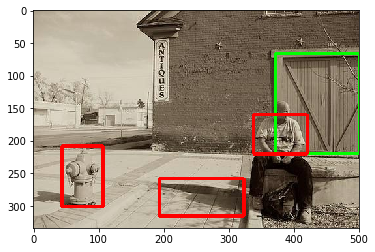

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Which is the empty scene ?
daytime


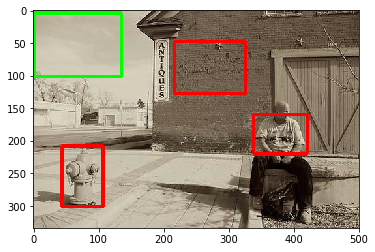

Which barn door is behind the man ?
door


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


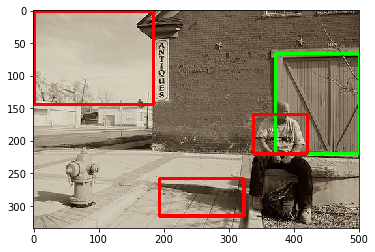

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Which is the area made from the man and the sun ?
shadow


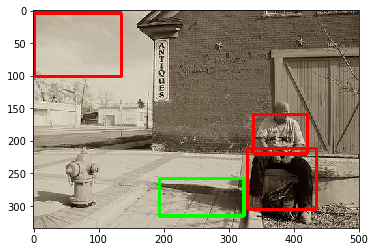

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Which pants is the man wearing ?
pants


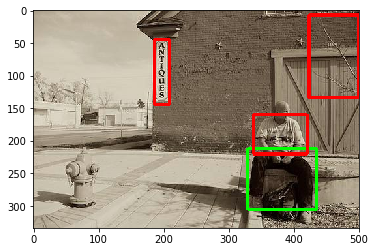

In [8]:
img, ptr = pointing.train_db
ptr_dataset_iterator = tf.contrib.eager.Iterator(ptr)
ptr_images_iterator = tf.contrib.eager.Iterator(img)
img_id = 0
for i in range(5):
    data = next(ptr_dataset_iterator)
    qwe, qce, ql, aw, ace, al,\
        m1we, m1ce, m2we, m2ce, m3we, m3ce, \
        ml, coord, qa_id, q_type, new_img_id = data    
    new_img_id = new_img_id.numpy()[0]
    if new_img_id != img_id:
        item = next(ptr_images_iterator)
        image, img_size, image_id = item
        image = image[...,::-1]
        image_id = image_id.numpy()[0]
        image = image.numpy()
        img_id = new_img_id
    assert(image_id == img_id)
    qwe = qwe.numpy()
    aw = aw.numpy()
    m1we = m1we.numpy()
    m2we = m2we.numpy()
    m3we = m3we.numpy()
    coord = coord.numpy()
    coord1, coord2, coord3, coord4 = coord[:4], coord[4:8], coord[8:12], coord[12:]
    question = decode_text(qwe)
    ans = decode_text(aw)
    orig = np.copy(image)
    img = draw_rectange(coord1, orig, (0, 225, 0))
    img = draw_rectange(coord2, img, (225, 0, 0))
    img = draw_rectange(coord3, img, (225, 0, 0))
    img = draw_rectange(coord4, img, (225, 0, 0))

    print(question)
    print(ans)
    plt.imshow(img)
    plt.show()


### Telling Dataset

In [9]:
telling_images = telling.train_db[0].batch(1)
telling_dataset = telling.train_db[1].batch(1)
img_id = 0
tl_images_iterator = tf.contrib.eager.Iterator(telling_images)
tl_dataset_iterator = tf.contrib.eager.Iterator(telling_dataset)

In [10]:
def decode_text(array):
    dt = filter(lambda x: x!="", [telling.dictionary.word_dictionary_rev[w] for w in array])
    return " ".join(list(dt))

What is written on the white square on the bus ?
["Donald 's Donuts .", "Mac 's Macaroni Hut .", "Smith 's Smothered Chicken Tenders ."]
Fox 's Ginger Biscuits .


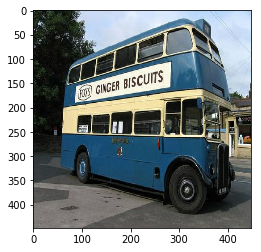

What kind of bus is this ?
['City bus .', 'School bus .', 'Party bus .']
Double decker bus .


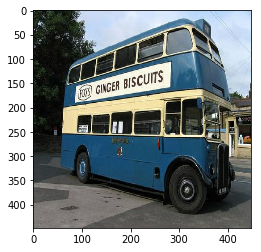

When is this scene taking place ?
['Night time .', 'Evening .', 'Morning .']
Day time .


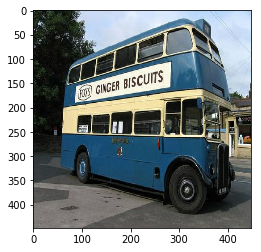

What is the number on the very top of the bus ?
['Eight nine .', 'Sixty five .', 'Forty two .']
Seventy four .


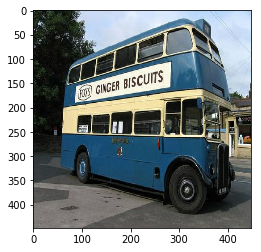

How many windows are visible on the side of the bus ?
['10 .', '28 .', '22 .']
11 .


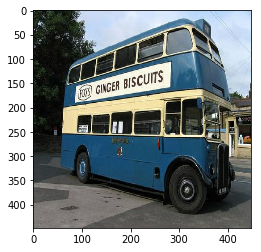

In [11]:
for i in range(5):
    data = next(tl_dataset_iterator)
    qwe, qce, ql, aw, ace, al, \
    m1we, m1ce, m2we, m2ce, m3we, m3ce, \
    ml, qa_id, q_type, new_img_id = data 
    new_img_id = new_img_id.numpy()[0][0]
    if new_img_id != img_id:
        item = next(tl_images_iterator)
        image, image_size, image_id = item
        image = image[...,::-1]
        image_id = image_id.numpy()[0]
        image = image.numpy()[0]
        img_id = new_img_id
    assert(image_id == img_id)
    qwe = qwe.numpy()[0]
    aw = aw.numpy()[0]
    m1we = m1we.numpy()[0]
    m2we = m2we.numpy()[0]
    m3we = m3we.numpy()[0]
    
    question = decode_text(qwe)
    mlt_choice = [decode_text(m1we), decode_text(m2we), decode_text(m3we)]
    answer = decode_text(aw)
    
    print(question)
    print(mlt_choice)
    print(answer)
    plt.imshow(image)
    plt.show()